In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Создаёт вектор h размерности (n-1)
def create_h_nodes(x_nodes):
    return x_nodes[1:] - x_nodes[:-1]


In [3]:
#Создаёт матрицу A 
def create_matrix_A(h_nodes):
    left_diag = []
    main_diag = [1.]
    right_diag = [0.]
    for i in range(2, len(h_nodes) + 1):
        left_diag.append(h_nodes[i-2])
        main_diag.append(2 * (h_nodes[i-1] + h_nodes[i-2]))
        right_diag.append(h_nodes[i-1])
    left_diag.append(0.)
    main_diag.append(1.)
    return np.diag(main_diag) + np.diag(left_diag, -1) + np.diag(right_diag, 1)


In [4]:
#Создаёт матрицу B 
def create_matrix_B(h_nodes, a_nodes):
    matrix_B = [0.]
    for i in range(2, len(h_nodes) + 1):
        matrix_el = 3 / h_nodes[i-1] * (a_nodes[i] - a_nodes[i-1]) - \
                    3 / h_nodes[i-2] * (a_nodes[i-1] - a_nodes[i-2])
        matrix_B.append(matrix_el)
    matrix_B.append(0.)
    return np.array(matrix_B)


In [5]:
#Создаёт вектор коэффицентов b кубического сплайна, размерность (n-1)
def create_b_nodes(h_nodes, a_nodes, c_nodes):
    b_nodes = []
    for i in range(len(c_nodes) - 1):
        b_nodes.append(1 / h_nodes[i] * (a_nodes[i+1] - a_nodes[i]) - \
                       h_nodes[i] / 3 * (c_nodes[i+1] + 2 * c_nodes[i]))
    return np.array(b_nodes)


In [6]:
#Создаёт вектор коэффициентов c кубического сплайна, размерность (n)
def create_c_nodes(h_nodes, a_nodes):
    A = create_matrix_A(h_nodes)
    B = create_matrix_B(h_nodes, a_nodes)
    A_inv = np.linalg.inv(A)    # обратная матрица А
    c_nodes = np.array(A_inv.dot(B))
    return c_nodes


In [7]:
#Создаёт вектор коэффициентов d кубического сплайна, размерность (n-1)
def create_d_nodes(h_nodes, c_nodes):
    d_nodes = []
    for i in range(len(h_nodes)):
        d_nodes.append((c_nodes[i+1] - c_nodes[i]) / (3 * h_nodes[i]))
    return np.array(d_nodes)


In [8]:
#Матрица коэффициентов размерности (n-1) * 3
def qubic_spline_coeff(x_nodes, y_nodes):
    h_nodes = create_h_nodes(x_nodes)
    c_nodes = create_c_nodes(h_nodes, y_nodes)
    b_nodes = create_b_nodes(h_nodes, y_nodes, c_nodes)
    d_nodes = create_d_nodes(h_nodes, c_nodes)
    qubic_spline = []
    for i in range(len(x_nodes) - 1):
        qubic_spline.append([b_nodes[i], c_nodes[i], d_nodes[i]])
    return qubic_spline


In [9]:
#Вычисление промежутка, на котором находится заданный х
def get_index(x, x_nodes):
    for i in range(len(x_nodes) - 1):    
        if x_nodes[i] <= x <= x_nodes[i+1]:
            index = i
            break
    return index

In [10]:
#Вычисление значения кубического сплайна в заданной точке х
def qubic_spline(x, qs_coeff, x_nodes, y_nodes):
    index = get_index(x, x_nodes)
    a = y_nodes[index]
    b = qs_coeff[index][0]
    c = qs_coeff[index][1]
    d = qs_coeff[index][2]
    expression = a + b * (x - x_nodes[index]) + c * (x - x_nodes[index]) ** 2\
                   + d * (x - x_nodes[index]) ** 3
    return expression

In [11]:
#Вычисление первой производной кубического сплайна в точке х
def d_qubic_spline(x, qs_coeff, x_nodes, y_nodes):
    index = get_index(x, x_nodes)
    b = qs_coeff[index][0]
    c = qs_coeff[index][1]
    d = qs_coeff[index][2]
    expression = b + 2 * c * (x - x_nodes[index]) +3 * d * (x - x_nodes[index]) ** 2
    return expression

In [12]:
#Построение кубического сплайна по набору данных
def draw_spline(x_nodes, y_nodes):
    fig, ax = plt.subplots(figsize=(16,4))
    qubic_x = np.linspace(0, 1, 200)
    qubic_y = []
    for i in range(len(qubic_x)):
        qubic_y.append(qubic_spline(qubic_x[i], \
                       qubic_spline_coeff(x_nodes, y_nodes), x_nodes, y_nodes))
    ax.scatter(x_nodes, y_nodes, color='red', s=50, marker='o')
    ax.plot(qubic_x, qubic_y)

In [13]:
x_nodes = np.arange(0, 1.01, 0.1)
y_nodes = [3.37, 3.95, 3.73, 3.59, 3.15, 3.15, 3.05, 3.86, 3.60, 3.70, 3.02]

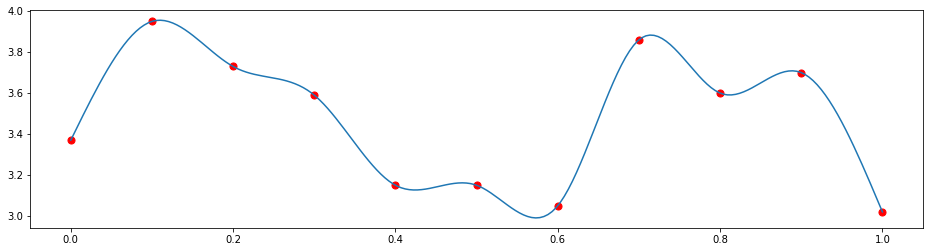

In [14]:
draw_spline(x_nodes, y_nodes)